# Main plots of the manuscript

In [10]:
import numpy as np
import pandas as pd
import string

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

In [2]:
#sns.set(style="white")
#sns.set_context("paper")

def figsize(scale,ratio):
    fig_width_pt = 500.484                         # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    if(ratio == "golden"):                          # Golden ratio ...
        fig_height = fig_width*golden_mean          # height in inches
    else:                                           # ... or other ratio
        fig_height = fig_width*ratio
        
    fig_size = [fig_width,fig_height]
    return fig_size


params = {'rcParams':    {'backend': 'pdf',
                                            'axes.labelsize': 8,
                                            'xtick.labelsize': 7,
                                            'ytick.labelsize': 7,
                                            'legend.fontsize': 8,
                                            'lines.markersize': 3,
                                            'font.size': 8,
                                            'axes.titlesize': 'large',
                                            'font.family': u'sans-serif',
                                            'font.sans-serif': ['Arial'],
                                            'text.usetex': False},
                            'figsize':     {'column_width': 87,
                                            'gutter_width': 4,
                                            'max_height': 240,
                                            'units': 'mm'},
                            'panel_labels':{}
                             }
plt.rcParams.update(params['rcParams'])

In [3]:
def stylize_axes(ax, title, xlabel, ylabel, xticks=None, yticks=None, xticklabels=None, yticklabels=None, despine=True):
    """Customize axes spines, title, labels, ticks, and ticklabels."""
    if despine:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    ax.xaxis.set_tick_params(top='off', direction='out', width=0.5)
    ax.yaxis.set_tick_params(right='off', direction='out', width=0.5)

    if title:
        ax.set_title(title)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if xticks:
        ax.set_xticks(xticks)
    if yticks:
        ax.set_yticks(yticks)
    if xticklabels:
        ax.set_xticklabels(xticklabels)
    if yticklabels:
        ax.set_yticklabels(yticklabels)

In [4]:
def fix_aspect_ratio(ax, ratio):
    xleft, xright = ax.get_xlim()
    ybottom, ytop = ax.get_ylim()
    # the abs method is used to make sure that all numbers are positive
    # because x and y axis of an axes maybe inversed.
    ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [6]:
colors = np.array([[89, 162, 110],
                  [245, 93, 62]])
colors = colors/255.

## Capacity

In [8]:
df_estebanlog_apps = pd.read_csv('../data/plots/apps_sample_capacitylog.csv')
df_estebanlog = pd.read_csv('../data/plots/mob_sample_capacitylog.csv')
df_sample_apps = pd.read_csv('../data/plots/apps_sample.csv')
df_sample_mob = pd.read_csv('../data/plots/mob_sample.csv')

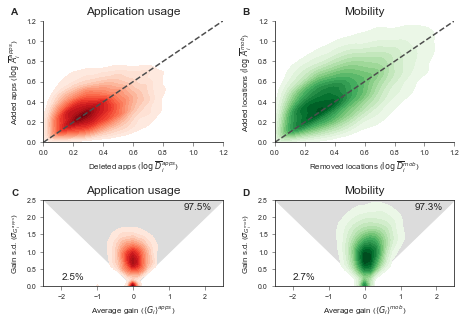

In [11]:
f, axs = plt.subplots(2, 2, figsize=figsize(0.95, 0.7), gridspec_kw = {'height_ratios':[1.4, 1]})

triangle_color = np.array([(220, 220, 220)])/255

sns.kdeplot(df_estebanlog_apps['avg_old'].values, df_estebanlog_apps['avg_new'].values, ax=axs[0,0], shade=True, cmap="Reds", shade_lowest=False,
           n_levels=20)
axs[0,0].set_xlim(0, 1.2)
axs[0,0].set_ylim(0, 1.2)
axs[0,0].plot(axs[0,0].get_xlim(), axs[0,0].get_ylim(), ls="--", c=".3")

sns.kdeplot(df_estebanlog['avg_old'].values, df_estebanlog['avg_new'].values, ax=axs[0,1], shade=True, cmap="Greens", shade_lowest=False,
           n_levels=20)
axs[0,1].set_xlim(0, 1.2)
axs[0,1].set_ylim(0, 1.2)
axs[0,1].plot(axs[0,1].get_xlim(), axs[0,1].get_ylim(), ls="--", c=".3")

x2 = df_sample_apps['mean'].values
y2 = df_sample_apps['std'].values
sns.kdeplot(x2, y2, kind='kde', cmap='Reds', shade=True, shade_lowest=False, zorder=-1, ax=axs[1,0],
           n_levels=20)

x1 = df_sample_mob['mean'].values
y1 = df_sample_mob['std'].values
sns.kdeplot(x1, y1, kind='kde', cmap="Greens", shade=True, shade_lowest=False, zorder=-1, ax=axs[1,1],
           n_levels=20)

mx, my = 2.5, 2.5
x_t = [0, mx, -1*mx]
y_t = [0, my, my]
x2_t = [0, -1*mx, mx]
axs[1,0].fill_betweenx(y_t, x_t, x2_t, color=triangle_color, edgecolor=triangle_color, zorder=-2)
axs[1,1].fill_betweenx(y_t, x_t, x2_t, color=triangle_color, edgecolor=triangle_color, zorder=-2)


axs[1,0].set_xlim(-1*mx, mx)
axs[1,0].set_ylim(0, my)
axs[1,1].set_xlim(-1*mx, mx)
axs[1,1].set_ylim(0, my)

p_apps = np.around((1 - len(x2[np.abs(x2)<=y2])/len(x2)) * 100, 2)
p_mob = np.around((1 - len(x1[np.abs(x1)<=y1])/len(x1)) * 100, 2)

axs[1,0].text(-2, 0.2, "{:.1f}%".format(p_apps))
axs[1,0].text(1.4, 2.2, "{:.1f}%".format(100-p_apps))
axs[1,1].text(-2, 0.2, "{:.1f}%".format(p_mob))
axs[1,1].text(1.4, 2.2, "{:.1f}%".format(100-p_mob))

stylize_axes(axs[0,0], title="Application usage", xlabel=r'Deleted apps ($\log\ \overline{D}_i^{apps}$)', ylabel=r'Added apps ($\log\ \overline{A}_i^{apps}$)')
stylize_axes(axs[0,1], title="Mobility", xlabel=r'Removed locations ($\log\ \overline{D}_i^{mob}$)', ylabel=r'Added locations ($\log\ \overline{A}_i^{mob}$)')
stylize_axes(axs[1,0], title="Application usage", xlabel=r"Average gain ($\left<G_{i}\right>^{apps}$)", ylabel=r'Gain s.d. ($\sigma_{G_{i}^{apps}}$)', despine=False)
stylize_axes(axs[1,1], title="Mobility", xlabel=r'Average gain ($\left<G_{i}\right>^{mob}$)', ylabel=r'Gain s.d. ($\sigma_{G_{i}^{mob}}$)', despine=False)

for n, ax in enumerate(axs.flatten()):
    ax.text(-0.18, 1.05, string.ascii_uppercase[n], transform=ax.transAxes, size=10, weight='bold')

f.tight_layout()
plt.savefig('../figures/capacity.pdf', dpi=300, bbox_inches='tight', pad_inches=0.05)

## Capacity age

In [16]:
df_age_stategy_apps = pd.read_csv('../data/plots/apps_capacity_add.csv')
df_age_stategy_mob = pd.read_csv('../data/plots/mob_capacity_add.csv')
df_capacity_age = pd.read_csv('../data/plots/capacity_age.csv')

/home/nadai/.local/share/virtualenvs/vodafone-Zcf9ZF5R/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


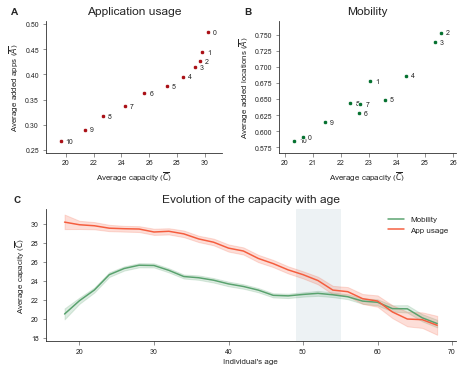

In [17]:
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D

f = plt.figure(figsize=figsize(0.95, 0.8))
gs1 = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 1.0])
ax1 = f.add_subplot(gs1[0, 0])
ax2 = f.add_subplot(gs1[0, 1])
ax3 = f.add_subplot(gs1[1, :])

axs = np.array([ax1, ax2, ax3])


#with plt.rc_context({'lines.linewidth': 0.9}):
sns.lineplot(x='age', y='avg(AS)', hue='type', data=df_capacity_age, ax=axs[2], palette=colors)
  
custom_lines = [Line2D([0], [0], color=colors[0]),
                Line2D([0], [0], color=colors[1])]
axs[2].legend(custom_lines, ['Mobility', 'App usage'], fancybox=False, shadow=False, framealpha=0)
axs[2].axvspan(49, 55, color=np.array([237, 242, 244])/255, alpha=1, zorder=-30)


x = df_age_stategy_apps['avg(AS)'].values
y = df_age_stategy_apps['avg_new'].values
z = df_age_stategy_apps.index.tolist()

sns.scatterplot(x, y, s=20, ax=axs[0], color=sns.color_palette("Reds")[-1])

for i, age_b in enumerate(df_age_stategy_mob.index.tolist()):
    xytext = (5, -2)
    arrowprops = None
    
    if age_b == 30:
        xytext = (-15, -2)
        #arrowprops = dict(facecolor='gray', width=2, headlength=1)
        
    if age_b == 15:
        age_b = '<20'
    
    axs[0].annotate(age_b, (x[i], y[i]), fontsize=7, xytext=xytext, textcoords='offset points', arrowprops=arrowprops, zorder=-2)


x = df_age_stategy_mob['avg(AS)'].values
y = df_age_stategy_mob['avg_new'].values
z = df_age_stategy_mob.index.tolist()

sns.scatterplot(x, y, s=20, ax=axs[1], color=sns.color_palette("Greens")[-1])

for i, age_b in enumerate(df_age_stategy_mob.index.tolist()):
    xytext = (5, -2)
    arrowprops = None
    
    if age_b == 55:
        xytext = (-5, 5)
    elif age_b == 65:
        xytext = (5, -6)
    elif age_b == 50:
        xytext = (5, -1)
        
    if age_b == 15:
        age_b = '<20'
    
    axs[1].annotate(age_b, (x[i], y[i]), fontsize=7, xytext=xytext, textcoords='offset points', arrowprops=arrowprops, zorder=-2)


stylize_axes(axs[0], title="Application usage", xlabel=r'Average capacity ($\overline{C}$)', ylabel=r'Average added apps ($\overline{A}$)')
stylize_axes(axs[1], title="Mobility", xlabel=r'Average capacity ($\overline{C}$)', ylabel=r'Average added locations ($\overline{A}$)')
stylize_axes(axs[2], title="Evolution of the capacity with age", xlabel='Individual\'s age', ylabel=r'Average capacity ($\overline{C}$)')

axs[0].margins(y=0.1, x=0.1)
axs[1].margins(y=0.1, x=0.1)


for n, ax in enumerate(axs):
    x = -0.20
    if n == 2:
        x = x/2+0.02
    ax.text(x, 1.05, string.ascii_uppercase[n], transform=ax.transAxes, size=10, weight='bold')

f.tight_layout()
plt.savefig('../figures/capacity_individual.pdf', dpi=300, bbox_inches='tight', pad_inches=0.05)

## Distribution apps

In [20]:
df_hist = pd.read_csv('../data/plots/apps_histogram.csv')
df_top_cats = pd.read_csv('../data/plots/apps_categories.csv')
df_apps_time_cats = pd.read_csv('../data/plots/apps_categories_time.csv')

In [23]:
ncats_display = 10

colors_cats = sns.color_palette("hls", ncats_display)

top_cats_df = df_apps_time_cats.groupby('category', as_index=False).sum().sort_values('c', ascending=False).head(15)
top_cats_df = df_top_cats.head(ncats_display)

cat_color = {x: colors_cats[i] for i, x in enumerate(top_cats_df['category'].values)}
cat_color

{'Communication': (0.86, 0.3712, 0.33999999999999997),
 'Social': (0.86, 0.6832, 0.33999999999999997),
 'Productivity': (0.7247999999999999, 0.86, 0.33999999999999997),
 'News & Magazines': (0.41279999999999994, 0.86, 0.33999999999999997),
 'Sports': (0.33999999999999997, 0.86, 0.5792000000000002),
 'Shopping': (0.33999999999999997, 0.8287999999999999, 0.86),
 'Music & Audio': (0.33999999999999997, 0.5167999999999995, 0.86),
 'Finance': (0.4752000000000003, 0.33999999999999997, 0.86),
 'Video Players & Editors': (0.7871999999999999, 0.33999999999999997, 0.86),
 'Health & Fitness': (0.86, 0.33999999999999997, 0.6207999999999999)}

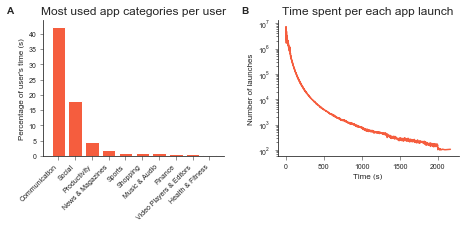

In [24]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
               
                                                  
f, axs = plt.subplots(1,2, figsize=figsize(0.95, 0.5))

# Top cats
X = np.arange(0, ncats_display)
height = top_cats_df['c'].values
cs = [cat_color[x] if x in cat_color else (0.2,0.2,0.2) for x in df_top_cats['category'].values]
    
for x,h,c,l in zip(X, height, cs, df_top_cats['category'].values.tolist()):
    axs[0].bar(x, h*100, align='center', color=colors[1], label=l)
axs[0].set_xticks(X)
axs[0].set_xticklabels(df_top_cats['category'].values.tolist(), rotation='45', ha='right')

# Launch times

axs[1].plot(df_hist['use_range'].values, df_hist['count'].values, color=colors[1])
axs[1].set_yscale('log')
#axs[1].set_xscale('log')

stylize_axes(axs[0], title="Most used app categories per user", xlabel=None, ylabel="Percentage of user's time (s)")
stylize_axes(axs[1], title="Time spent per each app launch", xlabel="Time (s)", ylabel="Number of launches")

for n, ax in enumerate(axs):
    x = -0.20
    ax.text(x, 1.05, string.ascii_uppercase[n], transform=ax.transAxes, size=10, weight='bold')

f.tight_layout()
plt.savefig('../figures/appendix1.pdf', dpi=300, bbox_inches='tight', pad_inches=0.05)

## Background - Foreground

In [26]:
df_apps_fu = pd.read_csv('../data/plots/apps_background_foreground_frequency.csv')
df_apps_tu = pd.read_csv('../data/plots/apps_background_foreground_time.csv')

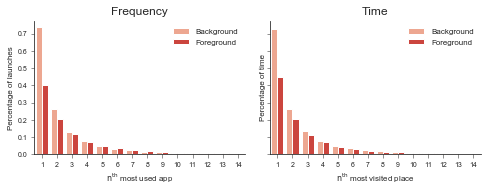

In [27]:
f, axs = plt.subplots(1, 2, figsize=figsize(1, 0.4), sharey=True)

g = sns.barplot(x="rank_frequency", y="nstarts", hue="Type", data=df_apps_fu, palette="Reds", ax=axs[0])

g = sns.barplot(x="rank_time", y="nsecs", hue="Type", data=df_apps_tu, palette="Reds", ax=axs[1])

axs[0].legend(fancybox=False, shadow=False, framealpha=0)
axs[1].legend(fancybox=False, shadow=False, framealpha=0)

stylize_axes(axs[0], title="Frequency", xlabel=r'$\rm{n}^\mathrm{th}$ most used app', ylabel="Percentage of launches")
stylize_axes(axs[1], title="Time", xlabel=r'$\rm{n}^\mathrm{th}$ most visited place', ylabel="Percentage of time")

f.tight_layout()
plt.savefig('../figures/appendix_ForeVsBack.pdf', dpi=300, bbox_inches='tight', pad_inches=0.05)

In [32]:
df_mob_ranks = pd.read_csv('../data/plots/df_mob_ranks.csv')
df_apps_ranks = pd.read_csv('../data/plots/df_apps_ranks.csv')
df_mob_ranks2 = pd.read_csv('../data/plots/df_mob_ranks2.csv')
df_apps_ranks2 = pd.read_csv('../data/plots/df_apps_ranks2.csv')

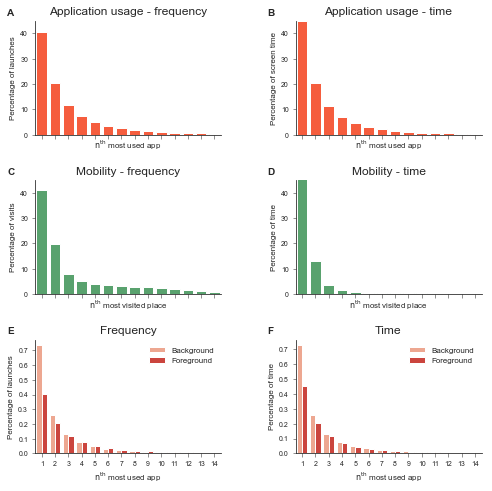

In [33]:
with sns.color_palette(colors):
    f, axs = plt.subplots(3, 2, figsize=figsize(1, 1), sharex=True)

    x = np.arange(15).astype('int')

    # the histogram of the data
    axs[0, 0].bar(x, df_apps_ranks.head(15)['nstarts'].values*100, color=colors[1])
    axs[1, 0].bar(x, df_mob_ranks.head(15)['frequency'].values*100, color=colors[0])
    
    axs[0, 0].set_ylim(0, 45)
    axs[1,0].set_ylim(0, 45)
    axs[0, 0].set_xticks(x)
    axs[1,0].set_xticks(x)
    
    # the histogram of the data
    axs[0,1].bar(x, df_apps_ranks2['nsecs'].values*100, color=colors[1])
    axs[1,1].bar(x, df_mob_ranks2['time_spent'].values*100, color=colors[0])
    
    axs[0,1].set_ylim(0, 45)
    axs[1,1].set_ylim(0, 45)
    axs[0,1].set_xticks(x)
    axs[1, 1].set_xticks(x)
    
    
    g = sns.barplot(x="rank_frequency", y="nstarts", hue="Type", data=df_apps_fu, palette="Reds", ax=axs[2,0])
    g = sns.barplot(x="rank_time", y="nsecs", hue="Type", data=df_apps_tu, palette="Reds", ax=axs[2,1])

    axs[2,0].legend(fancybox=False, shadow=False, framealpha=0)
    axs[2,1].legend(fancybox=False, shadow=False, framealpha=0)



    stylize_axes(axs[0, 0], title="Application usage - frequency", xlabel=r'$\rm{n}^\mathrm{th}$ most used app', ylabel="Percentage of launches")
    stylize_axes(axs[0,1], title="Application usage - time", xlabel=r'$\rm{n}^\mathrm{th}$ most used app', ylabel="Percentage of screen time")
    stylize_axes(axs[1,0], title="Mobility - frequency", xlabel=r'$\rm{n}^\mathrm{th}$ most visited place', ylabel="Percentage of visits")
    stylize_axes(axs[1,1], title="Mobility - time", xlabel=r'$\rm{n}^\mathrm{th}$ most visited place', ylabel="Percentage of time")
    stylize_axes(axs[2,0], title="Frequency", xlabel=r'$\rm{n}^\mathrm{th}$ most used app', ylabel="Percentage of launches")
    stylize_axes(axs[2,1], title="Time", xlabel=r'$\rm{n}^\mathrm{th}$ most used app', ylabel="Percentage of time")


    for n, ax in enumerate(axs.flatten()):
        ax.text(-0.15, 1.05, string.ascii_uppercase[n], transform=ax.transAxes, size=10, weight='bold')

    #axs[0].set_title(title_mob)
    #axs[1].set_title(title_apps)"nth most used app"
    f.tight_layout()
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    plt.savefig('../figures/appendix_descriptive.pdf', dpi=300, bbox_inches='tight', pad_inches=0.05)

## Most kept packages

In [34]:
df_apps_most_kept_packages = pd.read_csv('../data/plots/apps_most_kept_packages.csv')
df_apps_most_kept_packages.head(20)

,package_name,count_weeks,nusers
0,com.whatsapp,97.681032,91.936997
1,com.facebook.orca,96.570719,84.447394
2,com.facebook.katana,96.237493,90.804354
3,com.touchtype.swiftkey,95.647260,9.415096
4,com.android.chrome,93.870580,87.965667
5,com.google.android.apps.messaging,93.854950,7.316167
6,com.yahoo.mobile.client.android.mail,92.497539,11.537032
7,com.bskyb.skynews.android,90.655203,6.484382
8,com.rbs.mobile.android.natwest,89.970138,14.188125
9,com.grppl.android.shell.CMBlloydsTSB73,89.216434,12.680294


In [35]:
df_apps_most_kept_packages.tail(20)

,package_name,count_weeks,nusers
84,com.booking,53.810642,11.089284
85,uk.co.dominos.android,53.381602,7.470135
86,com.myfitnesspal.android,53.263288,7.241837
87,com.sec.android.app.music,53.145081,15.545527
88,com.ubercab.eats,52.135443,5.208389
89,com.samsung.android.oneconnect,50.508640,44.806654
90,com.samsung.android.spay,49.691463,19.764623
91,com.paypal.android.p2pmobile,48.809126,14.651801
92,bbc.iplayer.android,47.791348,11.016724
93,com.amazon.dee.app,47.570673,6.760464


## Categories of apps

In [38]:
df_apps_categories = pd.read_csv('../data/plots/apps_categories.csv.gz')
df_apps_categories.head(20)

,package_name,category
0,com.appscodder.ganeshhdwallpaper,Photography
1,com.afam.nantesparamoteu,Sports
2,com.crimsonlogic.gets,Business
3,ian.com.watch,Photography
4,com.dibastudio.skilletmusic.lyrics.andsongs,Entertainment
5,com.timerecorder,Productivity
6,com.words.puzzle.game.wordsushi,Games
7,com.josapps.saltchurchbocaraton,Productivity
8,com.weblogoscom.rmc,Music & Audio
9,com.andromo.dev592442.app614874,Food & Drink


## Persistence vs Rank and Strategy

In [28]:
df_apps_most_kept_rank2 = pd.read_csv('../data/plots/apps_most_kept_rank2.csv')
df_mob_most_kept_rank2 = pd.read_csv('../data/plots/mob_most_kept_rank2.csv')
df_apps_kept_distr_explorers = pd.read_csv('../data/plots/apps_kept_distr_explorers.csv')
df_mob_kept_distr_explorers = pd.read_csv('../data/plots/mob_kept_distr_explorers.csv')

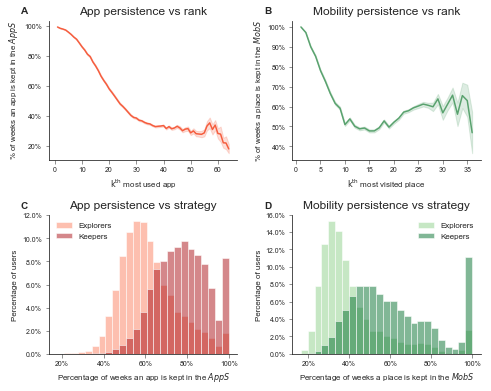

In [29]:
from matplotlib.ticker import PercentFormatter

outer_colors_apps = [sns.color_palette('Reds')[2], sns.color_palette('Reds')[-1]]
outer_colors_mob = [sns.color_palette('Greens')[2], sns.color_palette('Greens')[-1]]

with sns.color_palette(colors):
    f, axs = plt.subplots(2, 2, figsize=figsize(1, 0.8))

    sns.lineplot(x="rank", y="count_weeks_norm", data=df_mob_most_kept_rank2, ax=axs[0, 1], color=colors[0])
    sns.lineplot(x="rank", y="count_weeks_norm", data=df_apps_most_kept_rank2, ax=axs[0, 0], color=colors[1])

    # the histogram of the data
    data_exp = df_apps_kept_distr_explorers[df_apps_kept_distr_explorers['type_app'] == 'explorer']['count_weeks']
    data_kep = df_apps_kept_distr_explorers[df_apps_kept_distr_explorers['type_app'] == 'returner']['count_weeks']
    bins = np.histogram(np.hstack((data_exp, data_kep)), bins=25)[1]
    axs[1, 0].hist(data_exp, bins, color=list(outer_colors_apps[0])+[0.5], label="Explorers", weights=np.ones(len(data_exp)) / len(data_exp), linewidth = 0.5)
    axs[1, 0].hist(data_kep, bins, color=list(outer_colors_apps[1])+[0.5], label="Keepers", weights=np.ones(len(data_kep)) / len(data_kep), linewidth = 0.5)
    
    data_exp = df_mob_kept_distr_explorers[df_mob_kept_distr_explorers['type_mob'] == 'explorer']['count_weeks']
    data_kep = df_mob_kept_distr_explorers[df_mob_kept_distr_explorers['type_mob'] == 'returner']['count_weeks']
    bins = np.histogram(np.hstack((data_exp, data_kep)), bins=25)[1]
    axs[1, 1].hist(data_exp, bins, color=list(outer_colors_mob[0])+[0.5], label="Explorers", weights=np.ones(len(data_exp)) / len(data_exp), linewidth = 0.5)
    axs[1, 1].hist(data_kep, bins, color=list(outer_colors_mob[1])+[0.5], label="Keepers", weights=np.ones(len(data_kep)) / len(data_kep), linewidth = 0.5)
    
    axs[1, 0].legend(fancybox=False, shadow=False, framealpha=0)
    axs[1, 1].legend(fancybox=False, shadow=False, framealpha=0)

    stylize_axes(axs[0, 0], title="App persistence vs rank", xlabel=r'$\rm{k}^\mathrm{th}$ most used app', ylabel=r'% of weeks an app is kept in the $AppS$')
    stylize_axes(axs[0, 1], title="Mobility persistence vs rank", xlabel=r'$\rm{k}^\mathrm{th}$ most visited place', ylabel=r'% of weeks a place is kept in the $MobS$')
    stylize_axes(axs[1, 0], title="App persistence vs strategy", xlabel=r'Percentage of weeks an app is kept in the $AppS$', ylabel="Percentage of users")
    stylize_axes(axs[1, 1], title="Mobility persistence vs strategy", xlabel=r'Percentage of weeks a place is kept in the $MobS$', ylabel="Percentage of users")
    
    # Set the formatter
    axs[0, 0].yaxis.set_major_formatter(PercentFormatter(1))
    axs[0, 1].yaxis.set_major_formatter(PercentFormatter(1))
    
    axs[1, 0].yaxis.set_major_formatter(PercentFormatter(1))
    axs[1, 0].xaxis.set_major_formatter(PercentFormatter(1))
    axs[1, 1].yaxis.set_major_formatter(PercentFormatter(1))
    axs[1, 1].xaxis.set_major_formatter(PercentFormatter(1))

    for n, ax in enumerate(axs.flatten()):
        ax.text(-0.15, 1.05, string.ascii_uppercase[n], transform=ax.transAxes, size=10, weight='bold')

    f.tight_layout()

    plt.savefig('../figures/appendix_persistence_strategy.pdf', dpi=300, bbox_inches='tight', pad_inches=0.05)

## Persistence apps

In [39]:
df_apps_most_kept_distr = pd.read_csv('../data/plots/apps_most_kept_distr.csv')
df_top_bottom = pd.read_csv('../data/plots/apps_most_kept_cats.csv')

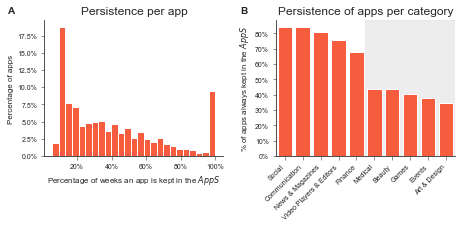

In [40]:
from matplotlib.ticker import PercentFormatter

f, axs = plt.subplots(1,2, figsize=figsize(0.95, 0.5))

data = df_apps_most_kept_distr['count_weeks_norm']
axs[0].hist(data, bins=25, color=colors[1], weights=np.ones(len(data)) / len(data))

back_color = np.array((220, 220, 220, 0))/255       

# Top cats
X = np.arange(0, 10)
height = df_top_bottom['count_weeks'].values

axs[1].axvspan(4.5, 9.5, alpha=0.5, color=back_color.tolist()) 
for x,h,l in zip(X, height, df_top_bottom['category'].values.tolist()):
    axs[1].bar(x, h, align='center', color=colors[1], label=l)
axs[1].set_xticks(X)
axs[1].set_xticklabels(df_top_bottom['category'].values.tolist(), rotation='45', ha='right')
plt.xlim(-0.5, 9.5)

stylize_axes(axs[0], title="Persistence per app", xlabel=r'Percentage of weeks an app is kept in the $AppS$', ylabel="Percentage of apps")
stylize_axes(axs[1], title="Persistence of apps per category", xlabel=None, ylabel=r'% of apps always kept in the $AppS$')

axs[0].xaxis.set_major_formatter(PercentFormatter(1))
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].yaxis.set_major_formatter(PercentFormatter(1))

for n, ax in enumerate(axs):
    x = -0.20
    ax.text(x, 1.05, string.ascii_uppercase[n], transform=ax.transAxes, size=10, weight='bold')

f.tight_layout()
plt.savefig('../figures/appendix_persistence_apps.pdf', dpi=300, bbox_inches='tight', pad_inches=0.05)

## Growth - capacity

In [54]:
df_growth_apps_capacity = pd.read_csv('../data/plots/growth_apps_capacity.csv')
df_growth_apps_age = pd.read_csv('../data/plots/growth_apps_age.csv')
df_growth_mob_capacity = pd.read_csv('../data/plots/growth_mob_capacity.csv')
df_growth_mob_age = pd.read_csv('../data/plots/growth_mob_age.csv')
df_growth_mob_age_all = pd.read_csv('../data/plots/df_growth_mob_age_all.csv')
df_growth_apps_age_all = pd.read_csv('../data/plots/df_growth_apps_age_all.csv')

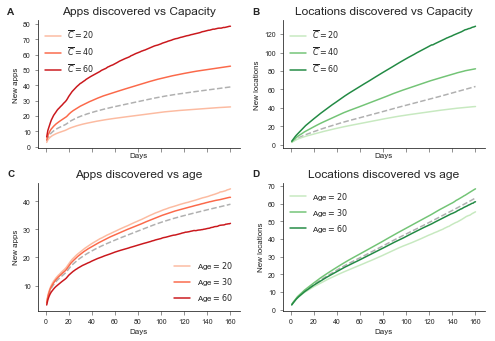

In [55]:
colors_mob = sns.color_palette("Greens", n_colors=7)
colors_apps = sns.color_palette("Reds", n_colors=7)
color_gray = np.array([176, 176, 176])/255
    
with sns.color_palette(colors):
    f, axs = plt.subplots(2, 2, figsize=figsize(1, 0.7), sharex=True)
    
    ## Capacity apps
    for i, s in enumerate([20, 40, 60]):
        df_toplot = df_growth_apps_capacity[df_growth_apps_capacity['meanAS'] == s]
        axs[0,0].plot(df_toplot['week'], df_toplot['new'], label=r'$\overline{C}='+str(s)+'$', color=colors_apps[i*2+1], zorder=1)
    
    ## Capacity mobility
    for i, s in enumerate([20, 40, 60]):
        df_toplot = df_growth_mob_capacity[df_growth_mob_capacity['meanAS'] == s]
        axs[0,1].plot(df_toplot['week'], df_toplot['new'], label=r'$\overline{C}='+str(s)+'$', color=colors_mob[i*2+1])
    
    ## Ages
    for i, s in enumerate([20, 30, 60]):
        df_toplot = df_growth_apps_age[df_growth_apps_age['age'] == s]
        axs[1,0].plot(df_toplot['week'], df_toplot['new'], label=r'Age$={}$'.format(s), color=colors_apps[i*2+1])
    
    ## Ages
    for i, s in enumerate([20, 30, 60]):
        df_toplot = df_growth_mob_age[df_growth_mob_age['age'] == s]
        axs[1,1].plot(df_toplot['week'], df_toplot['new'], label=r'Age$={}$'.format(s), color=colors_mob[i*2+1])
        
    axs[0,0].plot(df_growth_apps_age_all['week'], df_growth_apps_age_all['new'], '--', color=color_gray, zorder=-3, label='_nolegend_')
    axs[1,0].plot(df_growth_apps_age_all['week'], df_growth_apps_age_all['new'], '--', color=color_gray, zorder=-3, label='_nolegend_')
    axs[0,1].plot(df_growth_mob_age_all['week'], df_growth_mob_age_all['new'], '--', color=color_gray, zorder=-3, label='_nolegend_')
    axs[1,1].plot(df_growth_mob_age_all['week'], df_growth_mob_age_all['new'], '--', color=color_gray, zorder=-3, label='_nolegend_')    
    
    stylize_axes(axs[0, 0], title="Apps discovered vs Capacity",  xlabel="Days", ylabel="New apps")
    stylize_axes(axs[0, 1], title="Locations discovered vs Capacity",  xlabel="Days", ylabel="New locations")
    stylize_axes(axs[1, 0], title="Apps discovered vs age",  xlabel="Days", ylabel="New apps")
    stylize_axes(axs[1, 1], title="Locations discovered vs age",  xlabel="Days", ylabel="New locations")
    
    for n, ax in enumerate(axs.flatten()):
        ax.text(-0.15, 1.05, string.ascii_uppercase[n], transform=ax.transAxes, size=10, weight='bold')
        ax.legend(fancybox=False, shadow=False, framealpha=0)

    f.tight_layout()

    plt.savefig('../figures/appendix_growth.pdf', dpi=300, bbox_inches='tight', pad_inches=0.05)